In [1]:
python --version

NameError: name 'python' is not defined

In [1]:
print("hey")

hey


In [2]:
!pip install numpy

In [3]:
!pip install pandas

In [5]:
import pandas as pd
u=pd.DataFrame([10,20,30])

In [4]:
!pip install mysql-connector-python

In [5]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
     ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
     ('geolocation.csv', 'geolocation'),
    ('payments.csv', 'payments'),
      ('order_items.csv', 'order_items')# Added payments.csv for specific handling
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='root',
    database='ecommerce'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = "D:\E-Commerce\ecommerce_data"

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

<>:26: SyntaxWarning: invalid escape sequence '\E'
<>:26: SyntaxWarning: invalid escape sequence '\E'
C:\Users\pallavi.bhan\AppData\Local\Temp\ipykernel_8960\1259274470.py:26: SyntaxWarning: invalid escape sequence '\E'
  folder_path = "D:\E-Commerce\ecommerce_data"


Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Processing sellers.csv
NaN values before replacement:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Processing products.csv
NaN values before replacement:
product_id                      0
product category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
prod

In [9]:
db = mysql.connector.connect(host = "localhost",
                            username = "root",
                            password = "root",
                            database = "ecommerce")

cur = db.cursor()
    

# List all unique cities where customers are located.

In [10]:
query="""select distinct customer_city from customers """

cur.execute(query)
data=cur.fetchall()

data







[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo


# Count the number of orders placed in 2017.

In [11]:
query2=""" select count(order_id) from orders where year(order_purchase_timestamp)='2017' """
cur.execute(query2)
data1=cur.fetchall()
data1
data1[0][0]


print(f" The no of order purchased IN 2017 are {data1[0][0]}")

 The no of order purchased IN 2017 are 180404


# Find the total sales per category.

In [ ]:

query3= """    select product_category,round(sum(payment_value),2) as Total_sales from products p join order_items o on p.product_id=o.product_id
              join payments py on py.order_id=o.order_id
              group by 1   """
    
cur.execute(query3)
data3=cur.fetchall()
data3
df=pd.DataFrame(data3,columns=["product_category","Total_sales"])
df
sns.despine()
plt.yticks(rotation=45)
sns.barplot(x="Total_sales",y="product_category", data =df)
plt.tight_layout() 


C:\Users\pallavi.bhan\AppData\Local\Temp\ipykernel_8960\763816365.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Total_sales", y="product_category", data=df, palette='viridis')


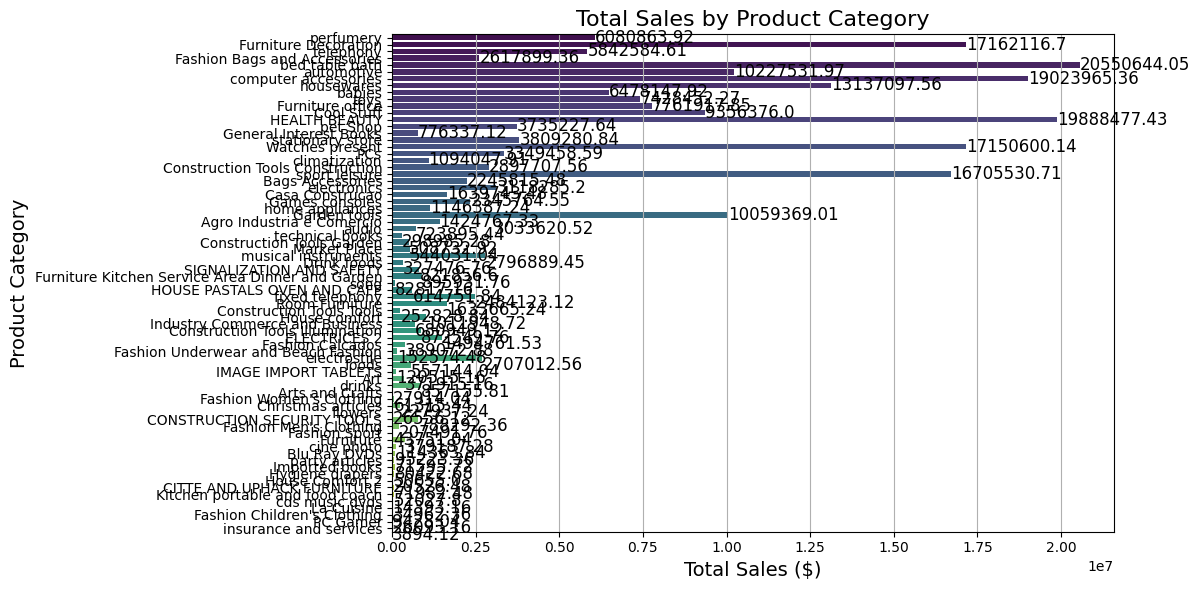

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame creation (replace this with your actual DataFrame)
# df = pd.read_csv('your_data.csv')  # Uncomment this line to load your data

# Example DataFrame structure
# df = pd.DataFrame({
#     'Total_sales': [100, 200, 150, 300],
#     'product_category': ['Electronics', 'Clothing', 'Groceries', 'Books']
# })

# Create the bar plot
plt.figure(figsize=(12, 6))  # Set the figure size
sns.barplot(x="Total_sales", y="product_category", data=df, palette='viridis')

# Add titles and labels
plt.title('Total Sales by Product Category', fontsize=16)
plt.xlabel('Total Sales ($)', fontsize=14)
plt.ylabel('Product Category', fontsize=14)

# Add value annotations on the bars
for index, value in enumerate(df['Total_sales']):
    plt.text(value, index, f'{value}', va='center', fontsize=12)

# Show grid lines for better readability
plt.grid(axis='x')

# Display the plot
plt.tight_layout()
plt.show()

# Calculate the percentage of orders that were paid in installments.

In [14]:
query= """ select  concat(sum(case when payment_installments >0 then 1 else 0 end)*100/count(*) ,"%") as sumofinstallments from  ecommerce.payments"""
cur.execute(query)
data=cur.fetchall()
print(f"The percentage of orders that were paid in installments is : {data[0][0]}")



The percentage of orders that were paid in installments is : 99.9981%


# Count the number of customers from each state. 

C:\Users\pallavi.bhan\AppData\Local\Temp\ipykernel_8960\4060429781.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_plot = sns.barplot(
C:\Users\pallavi.bhan\AppData\Local\Temp\ipykernel_8960\4060429781.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(


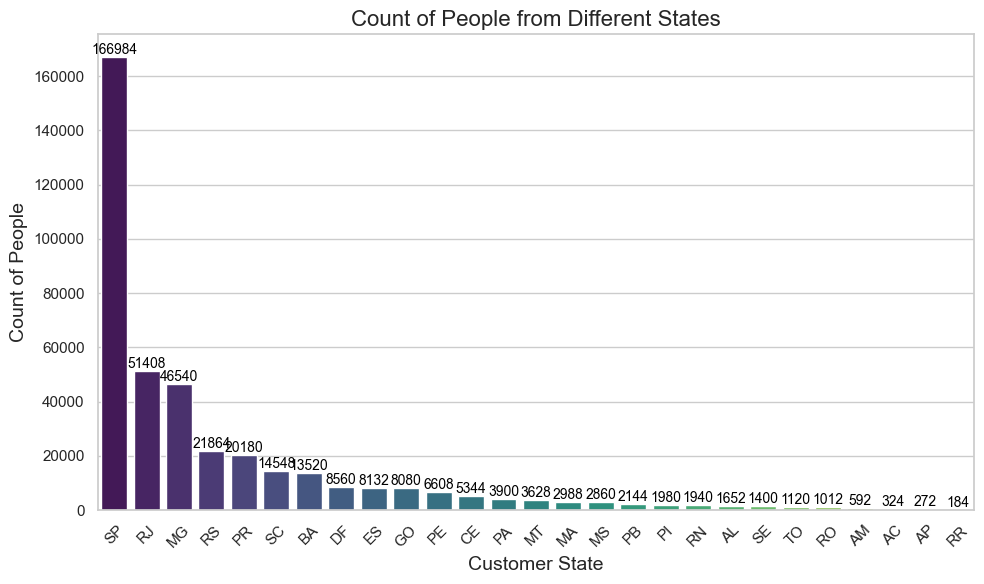

In [15]:
query="""select customer_state,count(*) as count_of_people_from_different_states from ecommerce.customers group by 1 """

cur.execute(query)
data=cur.fetchall()

data_frame=pd.DataFrame(data,columns=["customer_state","count_of_people_from_different_states"])


import seaborn as sns
import matplotlib.pyplot as plt

# Set the visual style
sns.set(style="whitegrid")
data_frame=data_frame.sort_values(by="count_of_people_from_different_states",ascending=False)

# Create the bar plot with enhancements
plt.figure(figsize=(10, 6))  # Set the figure size
bar_plot = sns.barplot(
    x="customer_state",
    y="count_of_people_from_different_states",
    data=data_frame,
    palette="viridis",  # Use a color palette
    estimator=sum,  # Change the aggregation function if needed
    ci=None  # Disable confidence intervals for clarity
)

# Add labels and title
bar_plot.set_xlabel("Customer State", fontsize=14)
bar_plot.set_ylabel("Count of People", fontsize=14)
bar_plot.set_title("Count of People from Different States", fontsize=16)

# Rotate x-tick labels for better readability if necessary
plt.xticks(rotation=45)

# Add value labels on top of the bars
for p in bar_plot.patches:
    bar_plot.annotate(
        f'{int(p.get_height())}', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', va='bottom', fontsize=10, color='black'
    )

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


# Intermediate Queries
# Calculate the number of orders per month in 2018.

C:\Users\pallavi.bhan\AppData\Local\Temp\ipykernel_8960\1785958088.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot=sns.barplot(x='2018_Months',y='Count_of_Orders',data=dataframe,palette="viridis",estimator=sum,errorbar=None)


<bound method _AxesBase.set_ylabel of <Axes: xlabel='2018', ylabel='Count_of_Orders'>>

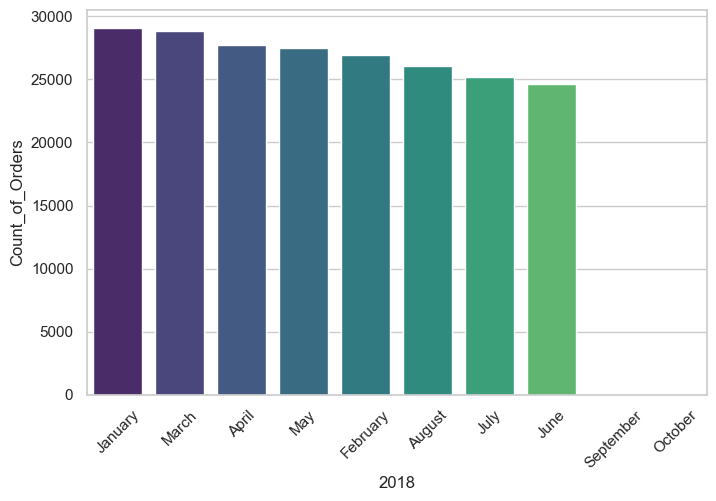

In [16]:


query= """ select 
monthname(str_to_date(order_purchase_timestamp,'%Y-%m-%d %H:%i:%s')) as 2018_Months,count(*) as Count_of_Orders from orders where year(order_purchase_timestamp)=2018 group by 1"""
cur.execute(query)
data=cur.fetchall()
import matplotlib.pyplot as plt
import seaborn as sns
dataframe=pd.DataFrame(data,columns=['2018_Months','Count_of_Orders'])
dataframe =dataframe.sort_values(by='Count_of_Orders',ascending=False)
dataframe
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
bar_plot=sns.barplot(x='2018_Months',y='Count_of_Orders',data=dataframe,palette="viridis",estimator=sum,errorbar=None)
bar_plot
plt.xticks(rotation=45)

bar_plot.set_xlabel("2018")
bar_plot.set_ylabel



In [17]:
dataframe

,2018_Months,Count_of_Orders
5,January,29076
4,March,28844
7,April,27756
6,May,27492
2,February,26912
1,August,26048
0,July,25168
3,June,24668
8,September,64
9,October,16


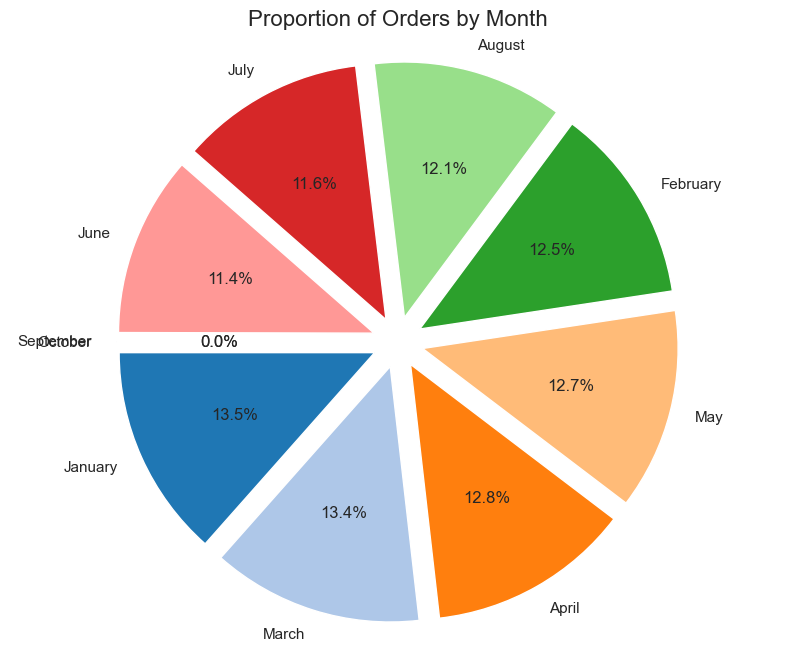

<Figure size 640x480 with 0 Axes>

In [18]:
import matplotlib.pyplot as plt

# Set up the data for the pie chart
labels = dataframe['2018_Months']
sizes = dataframe['Count_of_Orders']
colors = plt.cm.tab20.colors  # Use a color map for better aesthetics
explode = [0.1] * len(sizes)   # Slightly explode all slices for emphasis
# Create the pie chart
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels ,autopct='%1.1f%%', startangle=180, colors=colors, explode=explode)
plt.title('Proportion of Orders by Month', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

plt.tight_layout()

# Find the average number of products per order, grouped by customer city.

In [19]:
query= """ With avg_order_product as
 (
 select 
 o.order_id, o.customer_id,count(ot.order_id) as order_id_count
 from orders o join order_items as ot
 on o.order_id=ot.order_id
 group by 1,2
 )
 select customer_city, round(avg(order_id_count),2) as avg_order_per_city
 from avg_order_product ao join customers c
 on ao.customer_id=c.customer_id 
 group by 1 """


cur.execute(query)
data=cur.fetchall()
data
dataframe=pd.DataFrame(data,columns=["customer_city","avg_order_per_city"])
dataframe=dataframe.drop(index)
 

In [21]:
dataframe

,customer_city,avg_order_per_city
0,treze tilias,10.18
1,indaial,8.92
2,sao jose dos campos,9.11
3,sao paulo,9.25
4,porto alegre,9.40
...,...,...
4105,tibau do sul,8.00
4106,sao mamede,8.00
4107,guairaca,16.00
4108,sambaiba,8.00


# Calculate the percentage of total revenue contributed by each product category.

In [22]:
query= """select upper(products.product_category) category, 
round((sum(payments.payment_value)/(select sum(payment_value) from payments))*100,2) sales_percentage
from products join order_items 
on products.product_id = order_items.product_id
join payments 
on payments.order_id = order_items.order_id
group by category order by sales_percentage desc"""

conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='root',
    database='ecommerce'
)
cursor = conn.cursor()

cursor.execute(query)
data=cursor.fetchall()
data

[('BED TABLE BATH', 64.19),
 ('HEALTH BEAUTY', 62.12),
 ('COMPUTER ACCESSORIES', 59.42),
 ('FURNITURE DECORATION', 53.6),
 ('WATCHES PRESENT', 53.57),
 ('SPORT LEISURE', 52.18),
 ('HOUSEWARES', 41.03),
 ('AUTOMOTIVE', 31.94),
 ('GARDEN TOOLS', 31.42),
 ('COOL STUFF', 29.22),
 ('FURNITURE OFFICE', 24.24),
 ('TOYS', 23.2),
 ('BABIES', 20.23),
 ('PERFUMERY', 18.99),
 ('TELEPHONY', 18.25),
 ('STATIONARY STORE', 11.9),
 ('PET SHOP', 11.67),
 ('PCS', 10.46),
 ('ELECTRONICS', 9.74),
 (None, 9.47),
 ('CONSTRUCTION TOOLS CONSTRUCTION', 9.05),
 ('MUSICAL INSTRUMENTS', 8.74),
 ('ELECTROSTILE', 8.45),
 ('FASHION BAGS AND ACCESSORIES', 8.18),
 ('FIXED TELEPHONY', 7.76),
 ('GAMES CONSOLES', 7.33),
 ('BAGS ACCESSORIES', 7.01),
 ('CASA CONSTRUCAO', 5.12),
 ('ROOM FURNITURE', 5.1),
 ('ELECTRICES 2', 4.67),
 ('AGRO INDUSTRIA E COMERCIO', 4.45),
 ('HOME APPLIANCES', 3.58),
 ('CLIMATIZATION', 3.42),
 ('HOUSE COMFORT', 3.16),
 ('FURNITURE KITCHEN SERVICE AREA DINNER AND GARDEN', 2.8),
 ('CONSTRUCTION TOOLS

In [ ]:
import pandas as pd
import mysql.connector
import os

In [23]:
data

[('BED TABLE BATH', 64.19),
 ('HEALTH BEAUTY', 62.12),
 ('COMPUTER ACCESSORIES', 59.42),
 ('FURNITURE DECORATION', 53.6),
 ('WATCHES PRESENT', 53.57),
 ('SPORT LEISURE', 52.18),
 ('HOUSEWARES', 41.03),
 ('AUTOMOTIVE', 31.94),
 ('GARDEN TOOLS', 31.42),
 ('COOL STUFF', 29.22),
 ('FURNITURE OFFICE', 24.24),
 ('TOYS', 23.2),
 ('BABIES', 20.23),
 ('PERFUMERY', 18.99),
 ('TELEPHONY', 18.25),
 ('STATIONARY STORE', 11.9),
 ('PET SHOP', 11.67),
 ('PCS', 10.46),
 ('ELECTRONICS', 9.74),
 (None, 9.47),
 ('CONSTRUCTION TOOLS CONSTRUCTION', 9.05),
 ('MUSICAL INSTRUMENTS', 8.74),
 ('ELECTROSTILE', 8.45),
 ('FASHION BAGS AND ACCESSORIES', 8.18),
 ('FIXED TELEPHONY', 7.76),
 ('GAMES CONSOLES', 7.33),
 ('BAGS ACCESSORIES', 7.01),
 ('CASA CONSTRUCAO', 5.12),
 ('ROOM FURNITURE', 5.1),
 ('ELECTRICES 2', 4.67),
 ('AGRO INDUSTRIA E COMERCIO', 4.45),
 ('HOME APPLIANCES', 3.58),
 ('CLIMATIZATION', 3.42),
 ('HOUSE COMFORT', 3.16),
 ('FURNITURE KITCHEN SERVICE AREA DINNER AND GARDEN', 2.8),
 ('CONSTRUCTION TOOLS

In [25]:
query= """select upper(products.product_category) category, 
concat(round((sum(payments.payment_value)/(select sum(payment_value) from payments))*100,2),"%") sales_percentage
from products join order_items 
on products.product_id = order_items.product_id
join payments 
on payments.order_id = order_items.order_id
group by category order by sales_percentage desc"""


cursor.execute(query)
data=cursor.fetchall()
data

[('ELECTRONICS', '9.74%'),
 (None, '9.47%'),
 ('CONSTRUCTION TOOLS CONSTRUCTION', '9.05%'),
 ('MUSICAL INSTRUMENTS', '8.74%'),
 ('ELECTROSTILE', '8.45%'),
 ('FASHION BAGS AND ACCESSORIES', '8.18%'),
 ('FIXED TELEPHONY', '7.76%'),
 ('GAMES CONSOLES', '7.33%'),
 ('BAGS ACCESSORIES', '7.01%'),
 ('BED TABLE BATH', '64.19%'),
 ('HEALTH BEAUTY', '62.12%'),
 ('COMPUTER ACCESSORIES', '59.42%'),
 ('FURNITURE DECORATION', '53.6%'),
 ('WATCHES PRESENT', '53.57%'),
 ('SPORT LEISURE', '52.18%'),
 ('CASA CONSTRUCAO', '5.12%'),
 ('ROOM FURNITURE', '5.1%'),
 ('HOUSEWARES', '41.03%'),
 ('ELECTRICES 2', '4.67%'),
 ('AGRO INDUSTRIA E COMERCIO', '4.45%'),
 ('AUTOMOTIVE', '31.94%'),
 ('GARDEN TOOLS', '31.42%'),
 ('HOME APPLIANCES', '3.58%'),
 ('CLIMATIZATION', '3.42%'),
 ('HOUSE COMFORT', '3.16%'),
 ('COOL STUFF', '29.22%'),
 ('FURNITURE OFFICE', '24.24%'),
 ('TOYS', '23.2%'),
 ('BABIES', '20.23%'),
 ('FURNITURE KITCHEN SERVICE AREA DINNER AND GARDEN', '2.8%'),
 ('CONSTRUCTION TOOLS ILLUMINATION', '2.73%')

In [ ]:
data

# Identify the correlation between product price and the number of times a product has been purchased.


In [27]:
import numpy as np
cur = db.cursor()
query = """select products.product_category, 
count(order_items.product_id),
round(avg(order_items.price),2)
from products join order_items
on products.product_id = order_items.product_id
group by products.product_category"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["Category", "order_count","price"])

arr1 = df["order_count"]
arr2 = df["price"]

a = np.corrcoef([arr1,arr2])
print("the correlation is", a[0][-1])

the correlation is -0.10631514167157569


# Calculate the total revenue generated by each seller, and rank them by revenue.

C:\Users\pallavi.bhan\AppData\Local\Temp\ipykernel_8960\3131681509.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "seller_id", y = "revenue", data = df,palette="tab10")


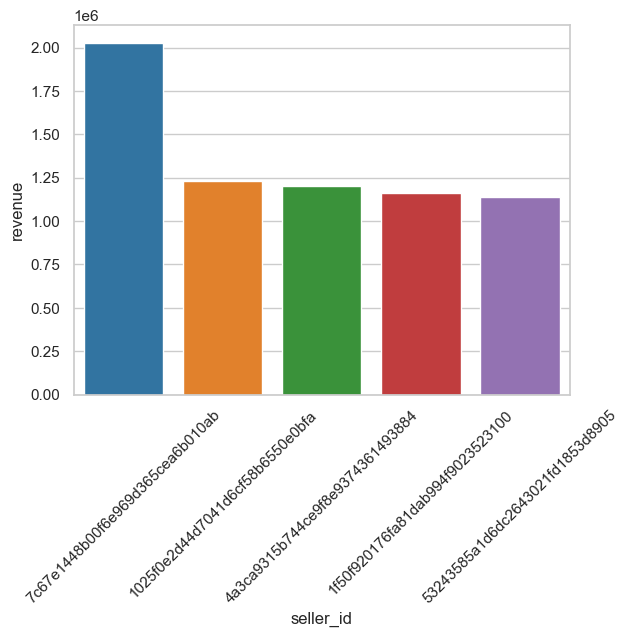

In [32]:
query = """ select *, dense_rank() over(order by revenue desc) as rn from
(select order_items.seller_id, sum(payments.payment_value)
revenue from order_items join payments
on order_items.order_id = payments.order_id
group by order_items.seller_id) as a """

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["seller_id", "revenue", "rank"])
df = df.head()
sns.barplot(x = "seller_id", y = "revenue", data = df,palette="tab10")
plt.xticks(rotation = 45)
plt.show()


# Calculate the moving average of order values for each customer over their order history.

In [33]:
query = """select customer_id, order_purchase_timestamp, payment,
avg(payment) over(partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row) as mov_avg
from
(select orders.customer_id, orders.order_purchase_timestamp, 
payments.payment_value as payment
from payments join orders
on payments.order_id = orders.order_id) as a"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data)
df

,0,1,2,3
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
2,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
3,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
4,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
...,...,...,...,...
831083,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
831084,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
831085,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
831086,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001


# Calculate the cumulative sales per month for each year.

In [34]:
query = """select years, months , payment, sum(payment)
over(order by years, months) cumulative_sales from 
(select year(orders.order_purchase_timestamp) as years,
month(orders.order_purchase_timestamp) as months,
round(sum(payments.payment_value),2) as payment from orders join payments
on orders.order_id = payments.order_id
group by years, months order by years, months) as a
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data)
df

,0,1,2,3
0,2016,9,2017.92,2.017920e+03
1,2016,10,472723.84,4.747418e+05
2,2016,12,156.96,4.748987e+05
3,2017,1,1107904.32,1.582803e+06
4,2017,2,2335264.08,3.918067e+06
5,2017,3,3598908.80,7.516976e+06
6,2017,4,3342304.24,1.085928e+07
7,2017,5,4743350.56,1.560263e+07
8,2017,6,4090211.04,1.969284e+07
9,2017,7,4739063.36,2.443191e+07


# Calculate the year-over-year growth rate of total sales.


In [35]:
query = """with a as(select year(orders.order_purchase_timestamp) as years,
round(sum(payments.payment_value),2) as payment from orders join payments
on orders.order_id = payments.order_id
group by years order by years)

select years, ((payment - lag(payment, 1) over(order by years))/
lag(payment, 1) over(order by years)) * 100 from a"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["years", "yoy % growth"])
df

,years,yoy % growth
0,2016,NaN
1,2017,12112.703759
2,2018,20.000924


# Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase

In [36]:
query = """with a as (select customers.customer_id,
min(orders.order_purchase_timestamp) first_order
from customers join orders
on customers.customer_id = orders.customer_id
group by customers.customer_id),

b as (select a.customer_id, count(distinct orders.order_purchase_timestamp) next_order
from a join orders
on orders.customer_id = a.customer_id
and orders.order_purchase_timestamp > first_order
and orders.order_purchase_timestamp < 
date_add(first_order, interval 6 month)
group by a.customer_id) 

select 100 * (count( distinct a.customer_id)/ count(distinct b.customer_id)) 
from a left join b 
on a.customer_id = b.customer_id ;"""

cur.execute(query)
data = cur.fetchall()

data


[(None,)]

# Identify the top 3 customers who spent the most money in each year.

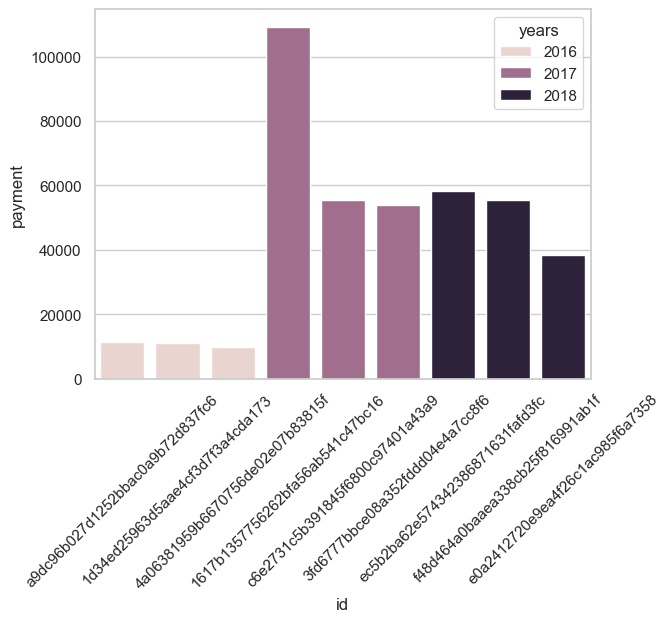

In [37]:
query = """select years, customer_id, payment, d_rank
from
(select year(orders.order_purchase_timestamp) years,
orders.customer_id,
sum(payments.payment_value) payment,
dense_rank() over(partition by year(orders.order_purchase_timestamp)
order by sum(payments.payment_value) desc) d_rank
from orders join payments 
on payments.order_id = orders.order_id
group by year(orders.order_purchase_timestamp),
orders.customer_id) as a
where d_rank <= 3 ;"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["years","id","payment","rank"])
sns.barplot(x = "id", y = "payment", data = df, hue = "years")
plt.xticks(rotation = 45)
plt.show()

In [39]:
data

[(2016, 'a9dc96b027d1252bbac0a9b72d837fc6', 11388.400390625, 1),
 (2016, '1d34ed25963d5aae4cf3d7f3a4cda173', 11205.919921875, 2),
 (2016, '4a06381959b6670756de02e07b83815f', 9822.240234375, 3),
 (2017, '1617b1357756262bfa56ab541c47bc16', 109312.640625, 1),
 (2017, 'c6e2731c5b391845f6800c97401a43a9', 55434.48046875, 2),
 (2017, '3fd6777bbce08a352fddd04e4a7cc8f6', 53813.28125, 3),
 (2018, 'ec5b2ba62e574342386871631fafd3fc', 58199.0390625, 1),
 (2018, 'f48d464a0baaea338cb25f816991ab1f', 55377.6796875, 2),
 (2018, 'e0a2412720e9ea4f26c1ac985f6a7358', 38475.51953125, 3)]